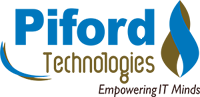

# Convolutional Neural Network Using Tensorflow on Custom Dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

room_types = os.listdir('dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))



['bed_room', 'dining_room', 'living_room']
Types of rooms found:  3


In [3]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('dataset' + '/' +item) + '/' + room))
    print(rooms[:1])


[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_r

In [4]:
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
print(rooms_df.tail())

  room type                                              image
0  bed_room        dataset/bed_room/apartment-2094734__340.jpg
1  bed_room        dataset/bed_room/apartment-4744139__340.jpg
2  bed_room     dataset/bed_room/architecture-2141065__340.jpg
3  bed_room  dataset/bed_room/architecture-modern-house-bea...
4  bed_room             dataset/bed_room/baby-1266117__340.jpg
       room type                                             image
388  living_room  dataset/living_room/victoria-borodinova-706.jpeg
389  living_room          dataset/living_room/wall-823611__340.jpg
390  living_room        dataset/living_room/woman-2099465__340.jpg
391  living_room         dataset/living_room/young-510440__340.jpg
392  living_room         dataset/living_room/young-510453__340.jpg


In [5]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

Total number of rooms in the dataset:  393


In [6]:
room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)

rooms in each category: 
bed_room       159
living_room    148
dining_room     86
Name: room type, dtype: int64


In [7]:
import cv2
path = 'dataset/'


im_size = 60

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    #filenames = [i for i in os.listdir(data_path) if i.endswith('.jpg')]
    filenames = [i for i in os.listdir(data_path) ]
   # print(filenames)  # will get the names of all images which ends with .jpg extension
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [8]:
# Transform the image array to a numpy type

images = np.array(images)

images.shape

(393, 60, 60, 3)

In [9]:
images = images.astype('float32') / 255.0

In [10]:
images.shape

(393, 60, 60, 3)

In [11]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


y=rooms_df['room type'].values
print(y[:5])

['bed_room' 'bed_room' 'bed_room' 'bed_room' 'bed_room']


In [12]:
# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [13]:
y=y.reshape(-1,1)
onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
Y= onehotencoder.fit_transform(y)
Y.shape  #(393, 3)

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(393, 3)

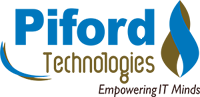

In [14]:

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(373, 60, 60, 3)
(373, 3)
(20, 60, 60, 3)
(20, 3)


In [15]:
#train_x=np.reshape(train_x,(373,10800))
#print(train_x.shape)

#test_x=np.reshape(test_x,(20,10800))
#test_x.shape



In [16]:
import tensorflow as tf
# Number of classes, one class for each of 5 flower.
num_classes = 3

# flattened imge
n_input = 10800


# architecture hyper-parameter
learning_rate = 0.001
training_iters = 10
batch_size = 16
display_step = 20

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\lenovo\

In [17]:
img_size=60
num_channels=3
#x = tf.placeholder(tf.float32, [None, n_input])
x = tf.placeholder(tf.float32, shape=[None, img_size,img_size,num_channels])  # None,60,60,3

y_ = tf.placeholder(tf.float32, [None, num_classes]) # None,3



print('Shape of placeholder',x.shape, y_.shape)


Shape of placeholder (?, 60, 60, 3) (?, 3)


# How Convolutional Neural Network Work?

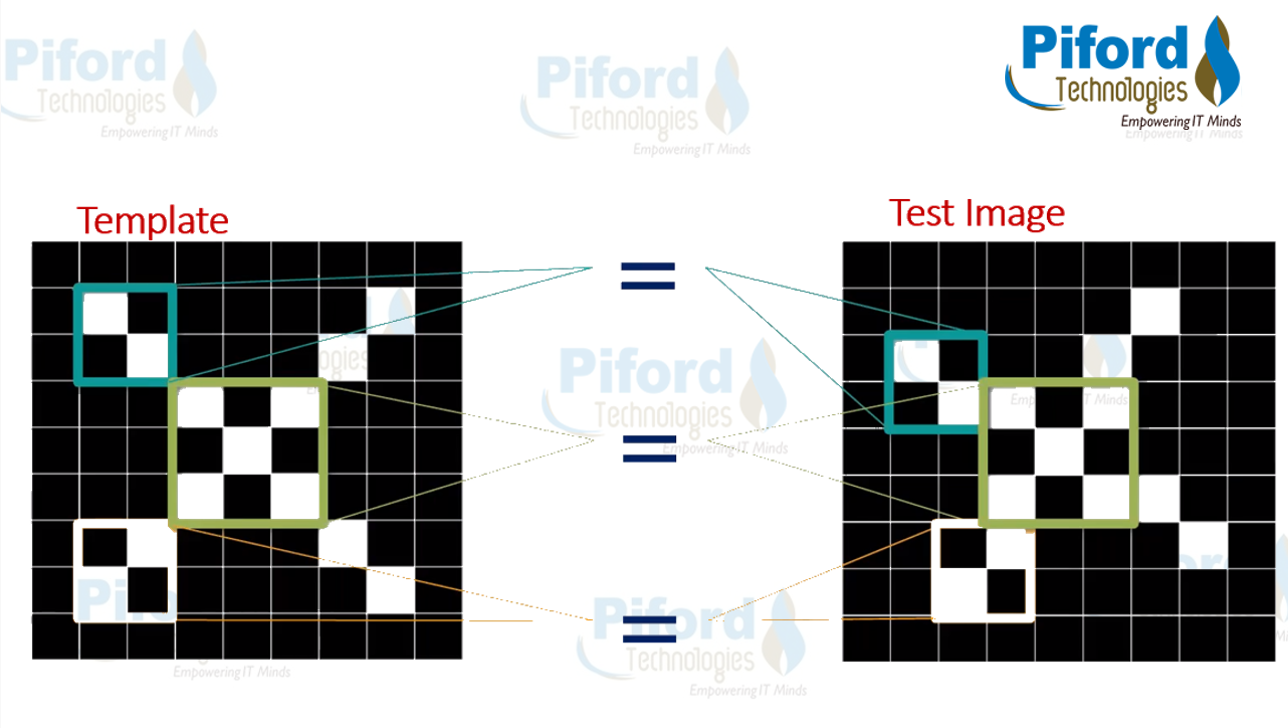

In [18]:
# optional use- if you want to add bias in conv layer then use this function by calling it in conv_net model
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')   # summation = wx+b, Activation
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')


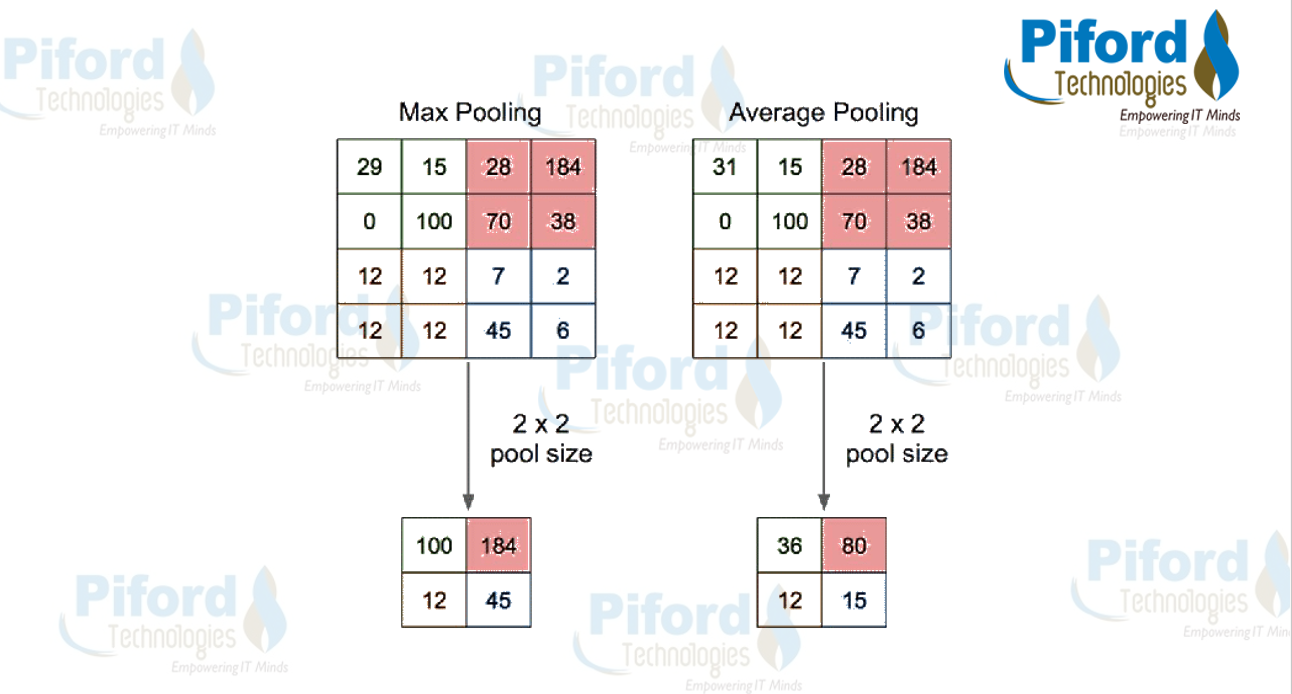

In [19]:
weights = {
    'w1': tf.Variable(tf.random_normal([5, 5, 3, 32]),name='w1'),
    'w2': tf.Variable(tf.random_normal([5, 5, 32, 64]),name='w2'),
    'w3': tf.Variable(tf.random_normal([5, 5, 64, 128]),name='w3'),
    'wd1': tf.Variable(tf.random_normal([8 * 8 * 128, 2048]),name='wd1'),  
    'wout': tf.Variable(tf.random_normal([2048, num_classes]),name='wout')
}

biases = {
    'b1': tf.Variable(tf.random_normal([32]),name='b1'),
    'b2': tf.Variable(tf.random_normal([64]),name='b2'),
    'b3': tf.Variable(tf.random_normal([128]),name='b3'),
    'bd1': tf.Variable(tf.random_normal([2048]),name='bd1'),
    'bout': tf.Variable(tf.random_normal([num_classes]),name='bout')
}

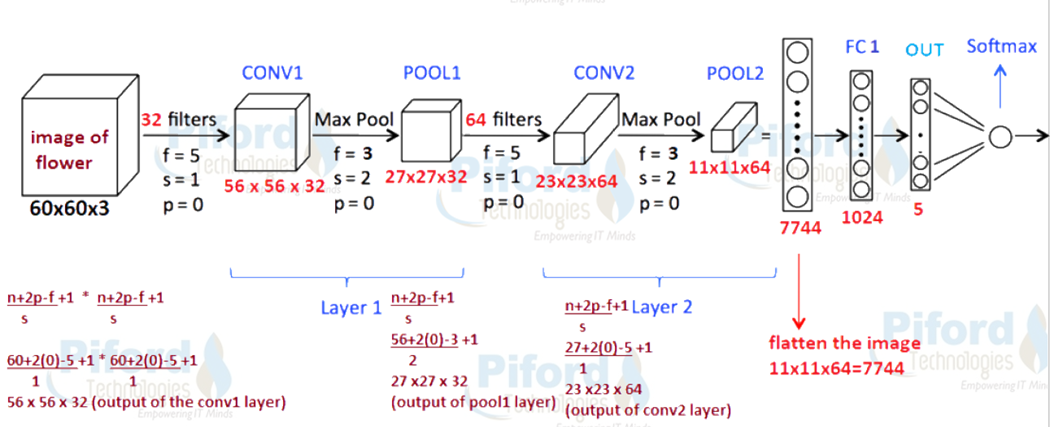

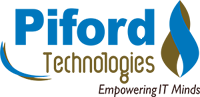

In [20]:
def conv_net(x, weights, biases):
        
    # reshape input to 60x60x3 size
    x = tf.reshape(x, shape=[-1, 60, 60, 3])  
    
    print("###########################################################################")
    print("size of x is")
    print(x.shape)
    
  
    conv1 = conv2d(x, weights['w1'], biases['b1'])
    conv1 = maxpool2d(conv1, k=2)
    print("###########################################################################")
    print("size after 1st conv layer is ")
    print(conv1.shape)

    
    #input is 30*30*32 image
    # Convolution Layer
    conv2 = conv2d(conv1, weights['w2'], biases['b2'])
    conv2 = maxpool2d(conv2, k=2)
    print("###########################################################################")
    print("size after 2nd conv and pooling layer is")
    print(conv2.shape)
    
    
    ### third conv layer
    # input is 15*15*64 image
    # Convolution Layer
    conv3 = conv2d(conv2, weights['w3'], biases['b3'])
  
    conv3 = maxpool2d(conv3, k=2)
    print("###########################################################################")
    print("size after 3rd conv and pooling layer is")
    print(conv3.shape)
    
    
    
    #input is 8*8*128 

    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input   = 8*8*128 = 8192
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    print("###########################################################################")
    print("shape after flattening the image")
    print(fc1)  #8192 is the output
    
    
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    print("###########################################################################")
    print("shape after fully connected layer")
    print(fc1)
    
    
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['wout']), biases['bout'])
    print("###########################################################################")
    print("Output layer")
    return out

In [21]:
# Create the model
model = conv_net(x, weights, biases)
print(model)

###########################################################################
size of x is
(?, 60, 60, 3)
###########################################################################
size after 1st conv layer is 
(?, 30, 30, 32)
###########################################################################
size after 2nd conv and pooling layer is
(?, 15, 15, 64)
###########################################################################
size after 3rd conv and pooling layer is
(?, 8, 8, 128)
###########################################################################
shape after flattening the image
Tensor("Reshape_1:0", shape=(?, 8192), dtype=float32)
###########################################################################
shape after fully connected layer
Tensor("Relu_3:0", shape=(?, 2048), dtype=float32)
###########################################################################
Output layer
Tensor("Add_1:0", shape=(?, 3), dtype=float32)


In [22]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y_))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [23]:
# Initializing the variables
init = tf.global_variables_initializer()

In [24]:
cost_history=[]
n_epochs =10
# the execution
sess = tf.Session()
sess.run(init)

train_y=train_y.todense()

for i in range(n_epochs):
    a, c = sess.run([optimizer, cost], feed_dict={x: train_x, y_: train_y})  #working
    cost_history = np.append(cost_history,c)  # working
    print('epoch : ', i,  ' - ', 'cost: ', c) #working 


epoch :  0  -  cost:  2710028.0
epoch :  1  -  cost:  4099955.0
epoch :  2  -  cost:  7131205.5
epoch :  3  -  cost:  3349683.8
epoch :  4  -  cost:  1997662.8
epoch :  5  -  cost:  2295634.2
epoch :  6  -  cost:  3463196.5
epoch :  7  -  cost:  3493877.8
epoch :  8  -  cost:  3155960.5
epoch :  9  -  cost:  3308183.0


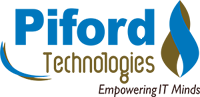

In [25]:


test_y=test_y.todense()  #working solution of ValueError: setting an array element with a sequence.
#print(test_y)

correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y_,1))   
correct_prediction 

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy


# retrun the accuracy on the test set.
print("Accuracy: ", sess.run(accuracy, feed_dict={x: test_x, y_:test_y}))

Accuracy:  0.25
